### Approach to Keras:

1. Declare a Model
   1. Sequential: Sequence of Layers
   2. Functional: Multiple models with sequences of layers interconnected
2. Declare the Layers
   1. Embedding Layer, Dense Layers, Dropout Layers
   2. Tune the layers (Number of Neurons, act func, input_shape)
   3. Specify the output Layers
3. Compile the Model
   1. Optimizer (SGD, Adam)
   2. Loss Function (LogLoss/CrossEntropy, RMSE, MSE, MAE)
   3. Metrics for Evaluation (F1, Precision, Recall, Acc)
4. Fit the model
   1. X & Y
   2. Epochs
   3. Verbose = Log of the model run information

Load the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical


Load the dataset

In [ ]:
data = pd.read_csv('/content/spam.csv', encoding = 'latin-1')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Drop the spill over columns

In [ ]:
data = data.iloc[:,:2]

In [ ]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Separate the messages and the labels

In [ ]:
# Extract message text and labels
messages = data["v2"].tolist()  # Assuming a "text" column for messages
labels = data["v1"].tolist()  # Assuming a "label" column for ham/spam (0 or 1)

Split data into train & test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(messages, labels, test_size =0.2, random_state = 42)

In [ ]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

4457
1115
4457
1115


CountVectorizer

In [ ]:
vectorizer = CountVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

In [ ]:
# Convert labels to numerical values (0 for ham, 1 for spam)
y_train = [1 if labels == 'spam' else 0 for labels in y_train]
y_test = [1 if labels == 'spam' else 0 for labels in y_test]

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Declare the model and layers

In [ ]:
x_train_vectorized.shape[1]

7735

In [ ]:
model = Sequential()
model.add(Dense(32, activation='tanh', input_shape=(x_train_vectorized.shape[1],))) #Input Layer & HL1
model.add(Dropout(0.3)) #Dropout to control overfitting
model.add(Dense(16, activation = 'tanh')) #HL2
model.add(Dropout(0.3)) #Dropout to control overfitting
model.add(Dense(2, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │         247,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 248,114 (969.20 KB)

 Trainable params: 248,114 (969.20 KB)

 Non-trainable params: 0 (0.00 B)

Compile the model

In [ ]:
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics = ['accuracy'])

Fit the model

In [ ]:
x_train_vectorized.sort_indices()

In [ ]:
history = model.fit(x_train_vectorized, y_train, epochs = 10, batch_size = 32, validation_data=(x_test_vectorized,y_test))

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8517 - loss: 0.4523 - val_accuracy: 0.9812 - val_loss: 0.0898
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9918 - loss: 0.0581 - val_accuracy: 0.9839 - val_loss: 0.0655
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9973 - loss: 0.0222 - val_accuracy: 0.9830 - val_loss: 0.0714
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9996 - loss: 0.0085 - val_accuracy: 0.9812 - val_loss: 0.0773
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9997 - loss: 0.0051 - val_accuracy: 0.9803 - val_loss: 0.0848
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.9812 - val_loss: 0.0911
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.9803 - val_loss: 0.0956
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.

In [ ]:
4457/32

139.28125

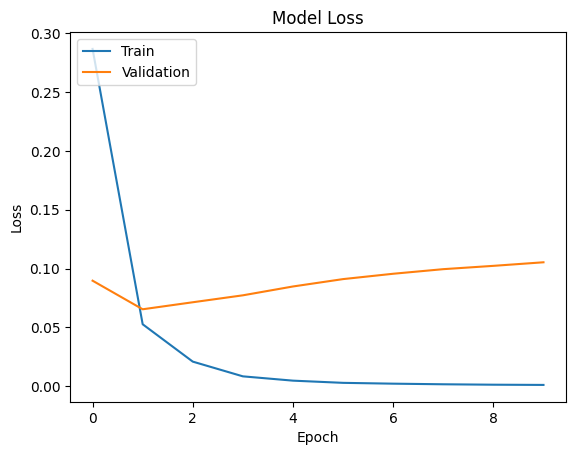

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Make predictions on new data (optional)
new_message = "let us go out"
new_message_vectorized = vectorizer.transform([new_message])
prediction = model.predict(new_message_vectorized)[0][0]
if prediction > 0.5:
  print("Predicted Spam")
else:
  print("Predicted Ham")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Predicted Spam


In [ ]:
print(model.predict(new_message_vectorized))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[0.99760914 0.0020656 ]]


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.8644 - loss: 0.3805 - val_accuracy: 0.9740 - val_loss: 0.0993
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.9815 - loss: 0.0758 - val_accuracy: 0.9668 - val_loss: 0.1067
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9908 - loss: 0.0373 - val_accuracy: 0.9803 - val_loss: 0.0747
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.9929 - loss: 0.0281 - val_accuracy: 0.9803 - val_loss: 0.0799
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.9960 - loss: 0.0201 - val_accuracy: 0.9839 - val_loss: 0.0599
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.9982 - loss: 0.0096 - val_accuracy: 0.9848 - val_loss: 0.0602
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.9991 - loss: 0.0043 - val_accuracy: 0.9839 - val_loss: 0.0643
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.9990 - loss: 0.0028 - val_accuracy: 0.9848 - v

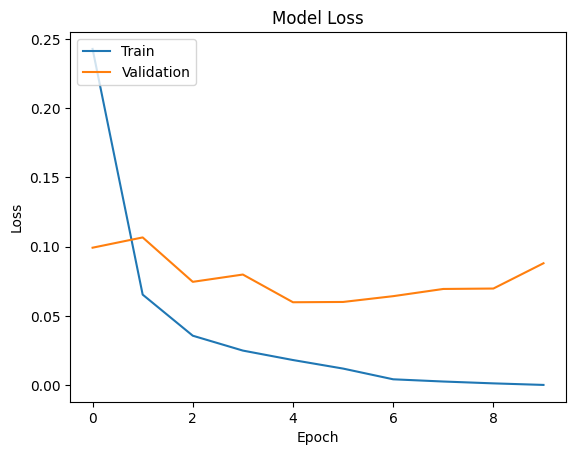

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, SimpleRNN
from keras.models import Sequential

# Tokenize the messages
max_words = 10000  # Maximum number of words to keep
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(messages)
sequences = tokenizer.texts_to_sequences(messages)

# Pad sequences to have the same length
max_length = 100  # Maximum length of sequences
padded_sequences = pad_sequences(sequences, maxlen=max_length)

# Split data into train & test
x_train, x_test, y_train, y_test = train_test_split(
    padded_sequences, labels, test_size=0.2, random_state=42
)

# Convert labels to numerical values (0 for ham, 1 for spam)
y_train = [1 if labels == 'spam' else 0 for labels in y_train]
y_test = [1 if labels == 'spam' else 0 for labels in y_test]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the RNN model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_length))
model.add(SimpleRNN(32))
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=60, validation_data=(x_test, y_test))

# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Make predictions on new data (optional)
new_message = "Okay fine i will be coming with you we will be having a great time together"
new_message_sequence = tokenizer.texts_to_sequences([new_message])
new_message_padded = pad_sequences(new_message_sequence, maxlen=max_length)
prediction = model.predict(new_message_padded)[0][0]
if prediction > 0.5:
  print("Predicted Spam")
else:
  print("Predicted Ham")
print(model.predict(new_message_padded))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[9.9995404e-01 4.2148818e-05]]
